## Fraude crediticio
- A partir de este dataset que ha pasado por un previo PCA antes de su descarga, trataremos de predecir el fraude crediticio.

In [1]:
## Importamos las bibliotecas a usar
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from skopt import BayesSearchCV
from yellowbrick.model_selection import FeatureImportances
from sklearn.metrics import confusion_matrix

In [2]:
## Importamos nuestro dataset
df=pd.read_csv(r"C:\Users\tobi_\OneDrive\Escritorio\Coder House\Data Science\DATA SET PROYECTO\FRAUDE\creditcard.csv")

In [3]:
## Tenemos un primer acercamiento a nuestros datos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [4]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [5]:
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [6]:
df_describe=df.describe()
df_describe

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,...,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [7]:
df["Class"].value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [8]:
## Al tener un dataset muy amplio haremos un muestreo.
## A su vez, para que dicha muestra no esté tan desbalanceada añadiremos una columna de densidad la cual guiará a la muestra
## a que datos traer.

In [9]:
## Para ello, le adjudicaremos un 90% de probabilidad de ser electa a las filas con clase no mientras que un 10% a las clases que si
no=0.9/284315
si=0.1/492

In [10]:
## Añadimos la columna al set de datos
weight = []
for row in df['Class']:
        if row == 0:   weight.append(no)    
        else:           weight.append(si)
df['weight'] = weight
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V22,V23,V24,V25,V26,V27,V28,Amount,Class,weight
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0,0.000003
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0,0.000003
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0,0.000003
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0,0.000003
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0,0.000003


In [11]:
## Verificamos que la columna weight es correcta, (debería dar 1 o tender a 1)
df["weight"].sum()

0.9999999999999998

In [12]:
## Realizamos el muestreo, y verificamos que la columna "weight" haya funcionado.
## Para ello, la clase "0" debería dar similar a 0.9 y la clase "1" cercano a 0.1 Random state=1
df_sample=df.sample(n=3000,weights=df["weight"],random_state=954)
print(df_sample["Class"].value_counts()/3000)
print(df_sample["Class"].value_counts())

0    0.928
1    0.072
Name: Class, dtype: float64
0    2784
1     216
Name: Class, dtype: int64


In [13]:
## Nos fijamos las relaciones que existen entre las features y la variable target
correlations=df_sample.iloc[:,:-1].corr()

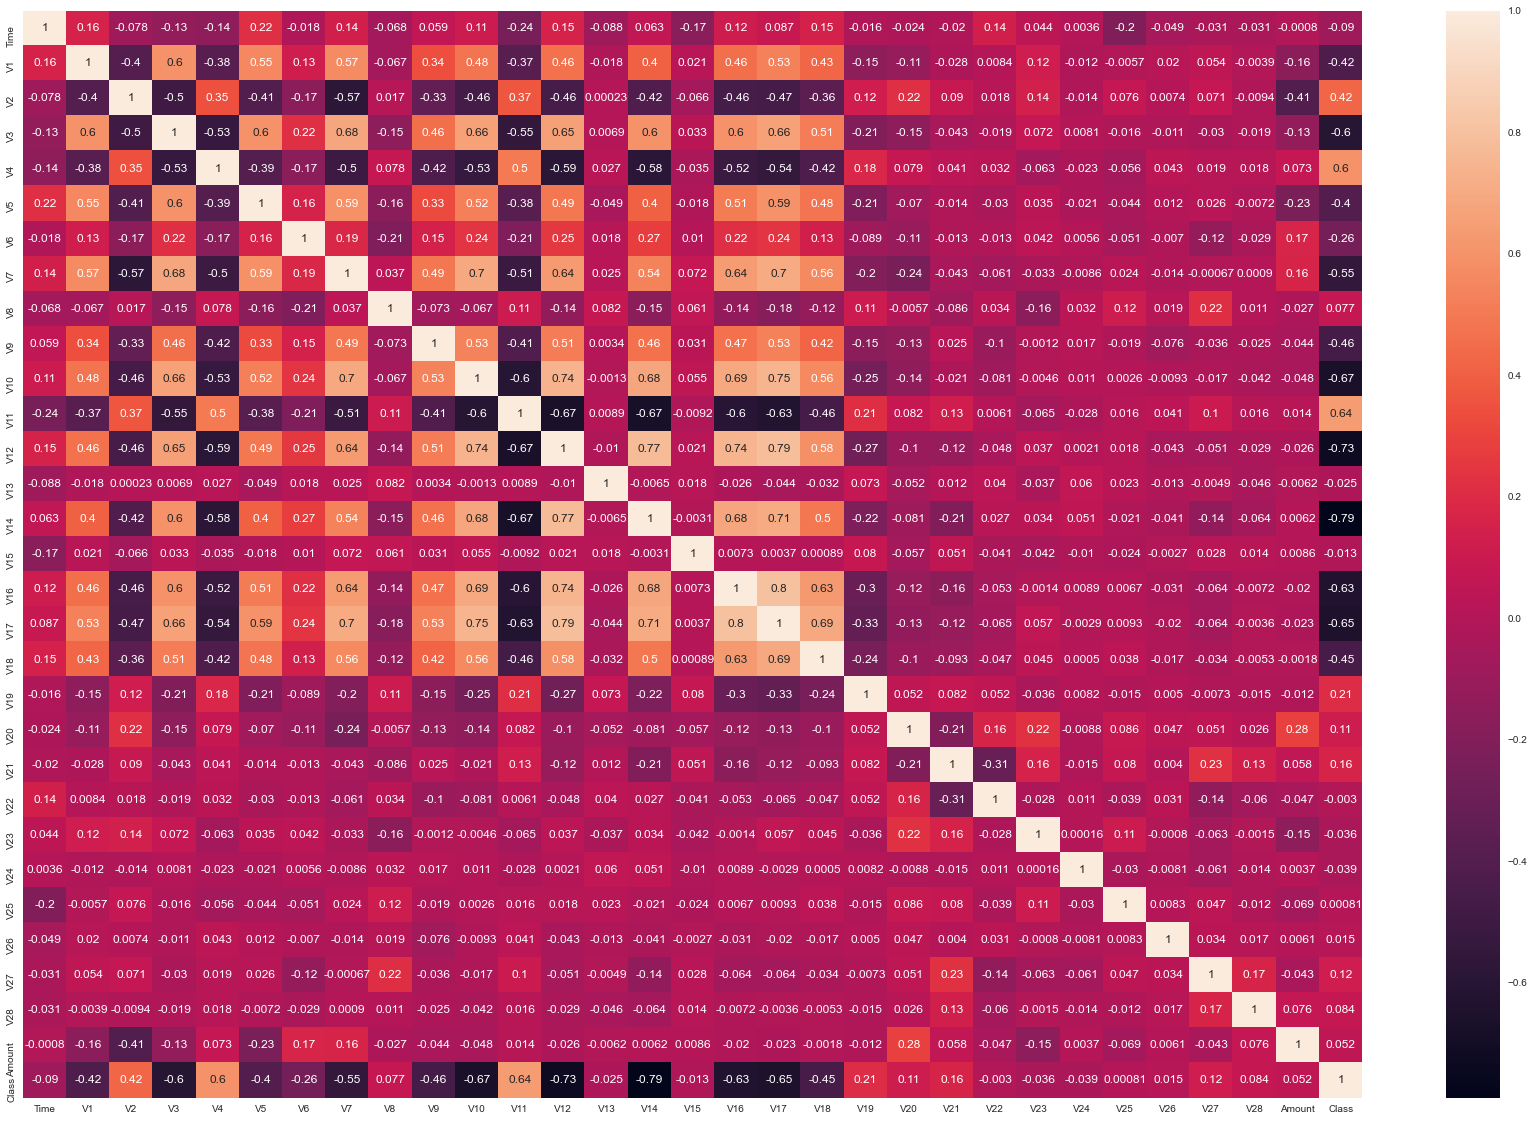

In [14]:
## Ploteamos las correlaciones para tener una visualización más simple.
fig,ax=plt.subplots(figsize=(30,20))
sns.heatmap(correlations,annot=True)

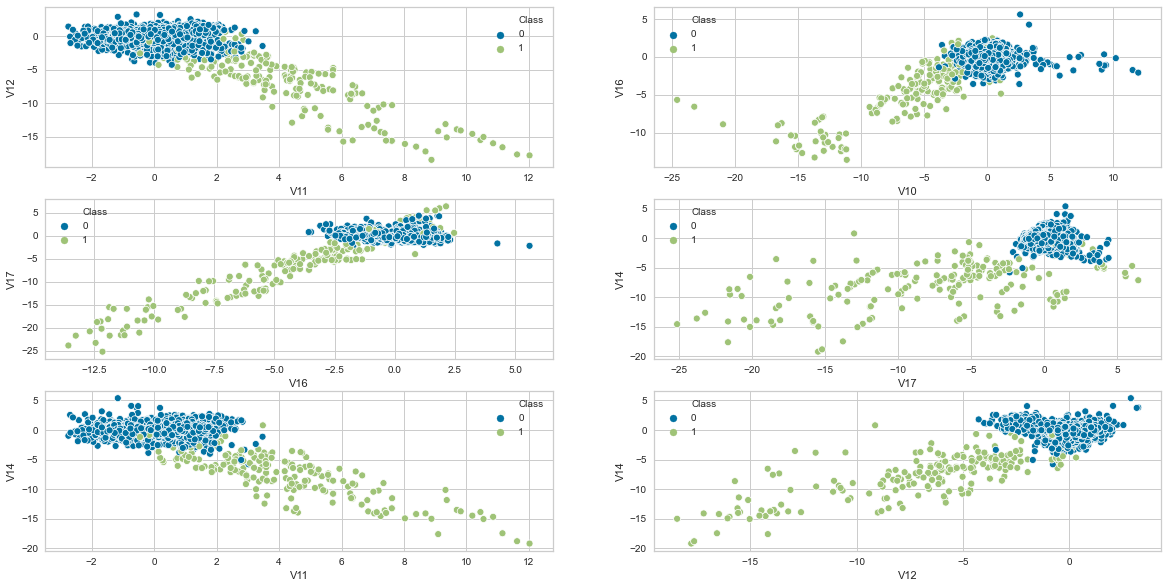

In [15]:
## Ploteamos las features que mejor correlacion tienen
17,16,14,12,11,10


fig,ax=plt.subplots(figsize=(20,10),
                    nrows=3,
                   ncols=2
                   )
sns.scatterplot(df_sample["V11"],df_sample["V12"],hue=df_sample["Class"],
                ax=ax[0,0]
               )
sns.scatterplot(df_sample["V10"],df_sample["V16"],hue=df_sample["Class"],
                ax=ax[0,1]
               )
sns.scatterplot(df_sample["V16"],df_sample["V17"],hue=df_sample["Class"],
                ax=ax[1,0]
               )
sns.scatterplot(df_sample["V17"],df_sample["V14"],hue=df_sample["Class"],
                ax=ax[1,1]
               )
sns.scatterplot(df_sample["V11"],df_sample["V14"],hue=df_sample["Class"],
                ax=ax[2,0]
               )
sns.scatterplot(df_sample["V12"],df_sample["V14"],hue=df_sample["Class"],
                ax=ax[2,1]
               )

In [16]:
X=df_sample[["V12","V14","V10","V11","V16","V17"]]
y=df_sample["Class"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

C:\Users\tobi_\anaconda3\lib\site-packages\yellowbrick\model_selection\importances.py:194: YellowbrickWarning: detected multi-dimensional feature importances but stack=False, using mean to aggregate them.
  warnings.warn(


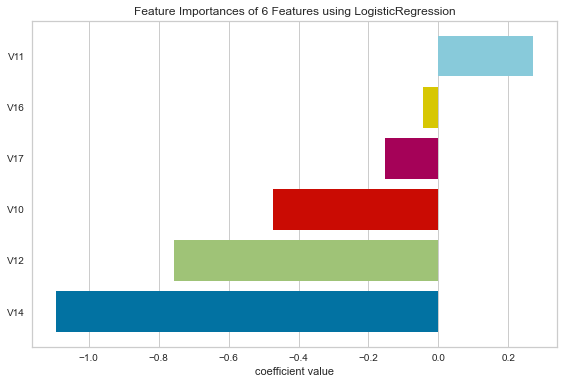

In [17]:
model = LogisticRegression(random_state=0)
viz = FeatureImportances(model, relative=False)
viz.fit(X_train, y_train)
viz.show()

In [18]:
## Nos quedamos únicamente con las 3 mejores variables
X=df_sample[["V12","V14","V10"]]
y=df_sample["Class"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [19]:
from sklearn.linear_model import LogisticRegression
clf = BayesSearchCV(
    LogisticRegression(random_state=0),
    {
        "solver":("newton-cg", "lbfgs", "liblinear", "sag", "saga")
        #,"C":(100, 10, 1.0, 0.1, 0.01)
        },
    n_iter=1,
    cv=2
)


In [20]:
## Entrenamos nuestro modelo de logistic regression
clf.fit(X_train, y_train)
y_train_predict=clf.predict(X_train)
y_test_predict=clf.predict(X_test)
print("Train",classification_report(y_train,y_train_predict, target_names=["0","1"]))
print("Test",classification_report(y_test,y_test_predict, target_names=["0","1"]))

Train               precision    recall  f1-score   support

           0       0.99      1.00      0.99      1873
           1       0.97      0.84      0.90       137

    accuracy                           0.99      2010
   macro avg       0.98      0.92      0.95      2010
weighted avg       0.99      0.99      0.99      2010

Test               precision    recall  f1-score   support

           0       0.99      1.00      1.00       911
           1       1.00      0.90      0.95        79

    accuracy                           0.99       990
   macro avg       1.00      0.95      0.97       990
weighted avg       0.99      0.99      0.99       990



AUC for our classifier is: 0.9649435265006386


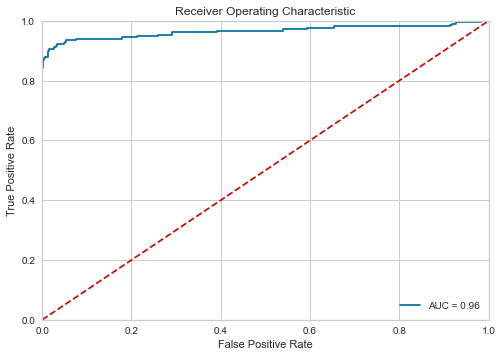

In [21]:
#Curva ROC
from sklearn.metrics import roc_curve, auc

class_probabilities = clf.predict_proba(X)
preds = class_probabilities[:, 1]

fpr, tpr, threshold = roc_curve(y, preds)
roc_auc = auc(fpr, tpr)

# AUC
print(f"AUC for our classifier is: {roc_auc}")

# Gráfica de la Curva ROC
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

## Otra métrica que podemos utilizar para ver que tan bien clasifica nuestro modelo es el área bajo la curva de ROC.
## Mientras mas cercano a 1 quiere decir que mejor clasifica nuestro modelo.
## La linea punteada del medio, gráfica como perfomaría el azar.

In [22]:
## Vemos que tiene muy buena perfomance, el problema es que al ser muy pocos los datos para la clase "SI", puede haber un
## problema de "overfitting".
## Como segunda prueba, podemos probar con el set entero de datos para ver que también "performa".
X=df[["V12","V14","V10"]]
y=df["Class"]

In [23]:
## Vemos que el modelo sigue siendo bueno en recall, pero bajó mucho su precisión.
y_predict=clf.predict(X)
print("Train",classification_report(y,y_predict, target_names=["0","1"]))

Train               precision    recall  f1-score   support

           0       1.00      1.00      1.00    284315
           1       0.55      0.84      0.66       492

    accuracy                           1.00    284807
   macro avg       0.77      0.92      0.83    284807
weighted avg       1.00      1.00      1.00    284807



In [24]:
confusion_matrix(y, y_predict)

array([[283969,    346],
       [    77,    415]], dtype=int64)

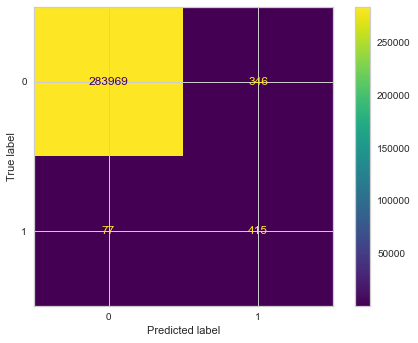

In [25]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(clf, X, y)
plt.show()

AUC for our classifier is: 0.959370611063619


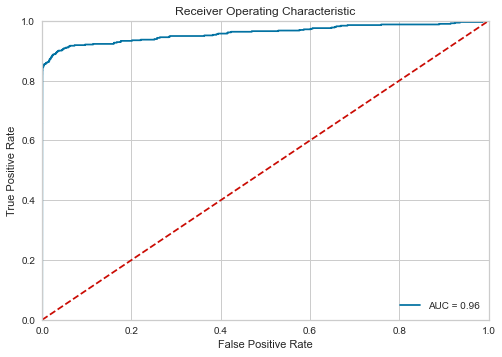

In [26]:
#Curva ROC
from sklearn.metrics import roc_curve, auc

class_probabilities = clf.predict_proba(X)
preds = class_probabilities[:, 1]

fpr, tpr, threshold = roc_curve(y, preds)
roc_auc = auc(fpr, tpr)

# AUC
print(f"AUC for our classifier is: {roc_auc}")

# Gráfica de la Curva ROC
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

### Conclusiones:
- Podríamos utilizar el modelo dependiendo de si nos interesa mas el "recall" que la "precisión", ya que el primero representa cuanto de los casos de fraude pudimos predecir mientras que la segunda métrica nos dice que proporción de nuestras predicciones fueron las correctas. 
- En un hipotético caso que la cantidad de falsos fraudes que detectemos no tenga ningún problema en la experiencia del usuario no habría problema en utilizar el modelo, ya que le dariamos mas importancia al "recall" que a la "precisión". En cambio, si esto afectase a la experiencia de los clientes no debería usarse ya que la métrica que mas interesa es la "precision".
- De todas formas, sería interesante poder obtener mas datos sobre transacciones de fraude para poder mejorar el modelo.